In [1]:
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns
import warnings
import pandas as pd
import numpy as np
from matplotlib.ticker import ScalarFormatter
import re
warnings.simplefilter(action='ignore', category=FutureWarning)
np.set_printoptions(suppress=True)
pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
df = pd.read_csv('../data/subway_user_year_v1_5.csv', index_col=0)
df = df.loc[df['조사연도'] == 2023]
df

,조사연도,호선명,역명,06시,07시,08시,09시,10시,11시,12시,...,15시,16시,17시,18시,19시,20시,21시,22시,23시,환승여부
0,2023,1호선,동대문,11190,12877,20197,34191,33805,33944,38914,...,47490,46898,45366,43532,41134,32754,25336,22636,18361,Y
1,2023,1호선,동묘앞,3358,7307,12120,24016,21734,25416,36277,...,58229,56147,48969,37361,25077,14362,9488,9366,8460,Y
2,2023,1호선,서울역,13990,52859,129585,265248,191913,125908,134271,...,133509,161585,176419,236816,288749,165631,150624,114133,76219,Y
3,2023,1호선,시청,5856,22443,67360,192501,92053,47941,54538,...,60602,66873,71422,104950,175739,67952,95058,51872,33430,Y
4,2023,1호선,신설동,9530,15027,36825,77257,47193,34667,34674,...,39307,41188,46266,56647,74450,38427,25804,23758,18700,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,2023,중앙선,망우,7431,12551,31373,33978,22054,20273,19643,...,22424,23285,26392,28834,37226,27825,10676,12877,11584,N
372,2023,중앙선,상봉,6007,8841,23089,28601,17966,12745,13667,...,14913,16459,16796,20829,29634,23907,8950,12048,11550,Y
373,2023,중앙선,양평,1431,4278,8031,10186,8098,9786,10129,...,11416,11550,11368,12086,11346,7457,4844,5210,4189,N
374,2023,중앙선,중랑,5924,10027,22975,25432,18871,12712,12752,...,14187,16288,18124,21251,27067,20209,6878,10458,10176,N


Text(0.5, 1.0, '호선별 역 갯수')

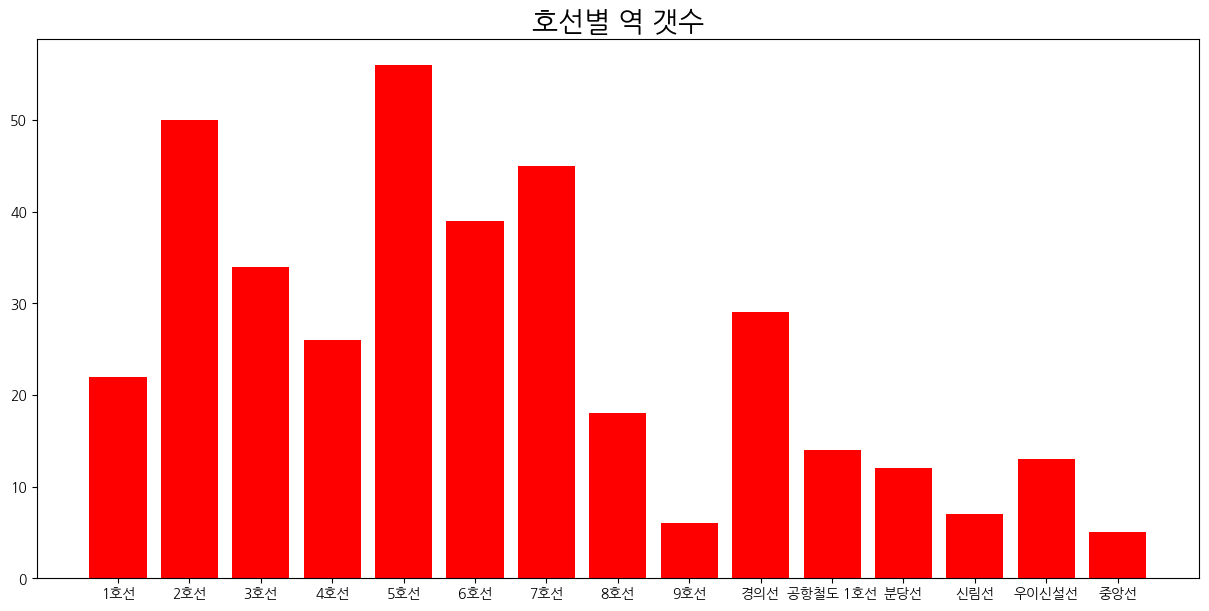

In [3]:
df5 = df.copy()
df5.loc[df['호선명']=='경부선'] = '1호선'
vdf5 = df5.groupby(by='호선명').count()
vdf5.index
plt.figure(figsize=(15,7))
plt.bar(vdf5.index, vdf5['역명'], color='r')
plt.title('호선별 역 갯수', fontsize=20)

In [5]:
popul_df = pd.read_csv('../data/등록인구_20250707111239.csv')
popul_df = popul_df[['동별(2)', '2025 1/4.1']]
popul_df = popul_df.drop([0,1])
popul_df.rename(columns={'동별(2)':'구', '2025 1/4.1':'인구수'}, inplace=True)
popul_df.head()

,구,인구수
2,소계,9602826
3,종로구,149478
4,중구,130418
5,용산구,216537
6,성동구,281062


In [6]:
df['sum'] = df.iloc[:,3:21].sum(axis=1)
df['morning'] = df.loc[:,'07시':'09시'].sum(axis=1)
df['evening'] = df.loc[:,'17시':'19시'].sum(axis=1)
df

,조사연도,호선명,역명,06시,07시,08시,09시,10시,11시,12시,...,18시,19시,20시,21시,22시,23시,환승여부,sum,morning,evening
0,2023,1호선,동대문,11190,12877,20197,34191,33805,33944,38914,...,43532,41134,32754,25336,22636,18361,Y,599784,67265,130032
1,2023,1호선,동묘앞,3358,7307,12120,24016,21734,25416,36277,...,37361,25077,14362,9488,9366,8460,Y,499309,43443,111407
2,2023,1호선,서울역,13990,52859,129585,265248,191913,125908,134271,...,236816,288749,165631,150624,114133,76219,Y,2726849,447692,701984
3,2023,1호선,시청,5856,22443,67360,192501,92053,47941,54538,...,104950,175739,67952,95058,51872,33430,Y,1322353,282304,352111
4,2023,1호선,신설동,9530,15027,36825,77257,47193,34667,34674,...,56647,74450,38427,25804,23758,18700,Y,696447,129109,177363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,2023,중앙선,망우,7431,12551,31373,33978,22054,20273,19643,...,28834,37226,27825,10676,12877,11584,N,392124,77902,92452
372,2023,중앙선,상봉,6007,8841,23089,28601,17966,12745,13667,...,20829,29634,23907,8950,12048,11550,Y,297765,60531,67259
373,2023,중앙선,양평,1431,4278,8031,10186,8098,9786,10129,...,12086,11346,7457,4844,5210,4189,N,153552,22495,34800
374,2023,중앙선,중랑,5924,10027,22975,25432,18871,12712,12752,...,21251,27067,20209,6878,10458,10176,N,282401,58434,66442


In [8]:
df1 = df.groupby(by='역명').sum().reset_index()
df1

,역명,조사연도,호선명,06시,07시,08시,09시,10시,11시,12시,...,18시,19시,20시,21시,22시,23시,환승여부,sum,morning,evening
0,4.19민주묘지,2023,우이신설선,1710,3328,9226,13012,9284,8113,8381,...,10564,10111,9178,3276,4947,3795,N,144520,25566,30462
1,가락시장,4046,3호선8호선,7491,22251,48888,96331,54051,44156,45815,...,72896,98929,55863,39858,37009,29689,YY,912592,167470,229836
2,가산디지털단지,4046,7호선경부선,21491,54967,203562,543315,304900,104822,79433,...,309161,453875,199988,179158,93795,60974,YY,3145125,801844,906708
3,가오리,2023,우이신설선,2560,6382,17043,20569,14594,11401,11220,...,15181,16914,14662,4018,8005,6208,N,212203,43994,46071
4,가좌,2023,경의선,2803,8517,23290,33174,17426,13547,13441,...,20028,27096,20945,7222,9189,8977,N,283974,64981,65316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,화랑대,2023,6호선,6342,21542,60439,61006,30563,22546,19660,...,32719,44466,36071,7632,19056,16351,N,493555,142987,103298
306,화전,2023,경의선,733,2323,4796,8205,6677,4157,3943,...,6925,6381,4556,2088,2472,2444,N,80547,15324,19081
307,회기,2023,중앙선,14099,29294,74024,109334,71935,60333,60417,...,98616,112770,80185,40548,55335,56943,N,1229058,212652,293909
308,회현,2023,4호선,1905,19699,52071,134560,99260,72550,75011,...,109852,136187,58659,86724,24881,14965,N,1306102,206330,341792


In [9]:
df1 = df1.sort_values(by='sum', ascending=False)
df1 = df1.reset_index(drop=True)
df1.to_csv('sort_sum.csv')
df1

,역명,조사연도,호선명,06시,07시,08시,09시,10시,11시,12시,...,18시,19시,20시,21시,22시,23시,환승여부,sum,morning,evening
0,잠실,4046,2호선8호선,19576,83632,214604,405802,322711,228206,237927,...,435753,559622,365864,397234,267171,205280,YY,5194890,704038,1346608
1,서울역,10115,1호선4호선경부선경의선공항철도 1호선,24098,97194,245019,460901,325796,220855,233563,...,411497,501571,295473,251044,203909,140926,YYYYY,4756511,803114,1217898
2,홍대입구,6069,2호선경의선공항철도 1호선,37949,55719,110724,209480,199723,164728,202937,...,408761,484791,367369,363598,293882,277901,YYY,4625083,375923,1236319
3,강남,2023,2호선,20720,65990,171696,333966,351250,195603,167947,...,366336,480236,311655,315962,225747,212947,Y,4331681,571652,1110558
4,고속터미널,4046,3호선7호선,12324,59810,110780,175861,197076,191391,218774,...,317358,316787,229746,309180,149931,99818,YY,3657799,346451,918556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,운천,2023,경의선,0,0,0,0,20,120,0,...,119,0,0,0,0,0,N,336,0,152
306,신내,2023,6호선,0,0,0,0,1,0,1,...,0,0,0,0,1,0,Y,4,0,1
307,신중동,2023,7호선,0,0,0,0,0,0,0,...,1,0,0,0,0,0,N,2,0,1
308,굴포천,2023,7호선,0,0,0,0,0,0,0,...,0,0,0,0,0,0,N,1,0,0


In [ ]:
df2 = df1.head(303)[['역명', 'sum', 'morning',	'evening']]
df2['sum-minus'] = df2['sum'] - df2['morning'] - df2['evening']
df2.reset_index(drop=True)
df2

,역명,sum,morning,evening,sum-minus
0,잠실,5194890,704038,1346608,3144244
1,서울역,4756511,803114,1217898,2735499
2,홍대입구,4625083,375923,1236319,3012841
3,강남,4331681,571652,1110558,2649471
4,고속터미널,3657799,346451,918556,2392792
...,...,...,...,...,...
298,화전,80547,15324,19081,46142
299,도림천,68324,16322,16170,35832
300,동작,65898,12398,17806,35694
301,남태령,64213,16331,16655,31227


In [118]:
com_df = pd.read_csv('../data/subway/com_count.csv', index_col=0)
com_df.describe()

,갯수
count,50.00
mean,175.18
std,169.37
min,17.00
25%,42.50
50%,119.50
75%,235.00
max,774.00


In [12]:
df3 = df2.copy()
df3['회사 수'] = np.nan

for _, a in com_df.iterrows():
    df3.loc[df3['역명'] == a['역명'], '회사 수'] = a['갯수']

df3.fillna(10, inplace=True)
df3

,역명,sum,morning,evening,sum-minus,회사 수
0,잠실,5194890,704038,1346608,3144244,72.00
1,서울역,4756511,803114,1217898,2735499,75.00
2,홍대입구,4625083,375923,1236319,3012841,251.00
3,강남,4331681,571652,1110558,2649471,619.00
4,고속터미널,3657799,346451,918556,2392792,44.00
...,...,...,...,...,...,...
298,화전,80547,15324,19081,46142,10.00
299,도림천,68324,16322,16170,35832,10.00
300,동작,65898,12398,17806,35694,10.00
301,남태령,64213,16331,16655,31227,10.00


In [13]:
tra_df = pd.read_csv('../data/subway_user_year_v1_5.csv', index_col=0)
tra_df = tra_df[tra_df['조사연도'] == 2023]
tra_df

,조사연도,호선명,역명,06시,07시,08시,09시,10시,11시,12시,...,15시,16시,17시,18시,19시,20시,21시,22시,23시,환승여부
0,2023,1호선,동대문,11190,12877,20197,34191,33805,33944,38914,...,47490,46898,45366,43532,41134,32754,25336,22636,18361,Y
1,2023,1호선,동묘앞,3358,7307,12120,24016,21734,25416,36277,...,58229,56147,48969,37361,25077,14362,9488,9366,8460,Y
2,2023,1호선,서울역,13990,52859,129585,265248,191913,125908,134271,...,133509,161585,176419,236816,288749,165631,150624,114133,76219,Y
3,2023,1호선,시청,5856,22443,67360,192501,92053,47941,54538,...,60602,66873,71422,104950,175739,67952,95058,51872,33430,Y
4,2023,1호선,신설동,9530,15027,36825,77257,47193,34667,34674,...,39307,41188,46266,56647,74450,38427,25804,23758,18700,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,2023,중앙선,망우,7431,12551,31373,33978,22054,20273,19643,...,22424,23285,26392,28834,37226,27825,10676,12877,11584,N
372,2023,중앙선,상봉,6007,8841,23089,28601,17966,12745,13667,...,14913,16459,16796,20829,29634,23907,8950,12048,11550,Y
373,2023,중앙선,양평,1431,4278,8031,10186,8098,9786,10129,...,11416,11550,11368,12086,11346,7457,4844,5210,4189,N
374,2023,중앙선,중랑,5924,10027,22975,25432,18871,12712,12752,...,14187,16288,18124,21251,27067,20209,6878,10458,10176,N


In [ ]:
tra_df1 = tra_df.groupby('역명').count().reset_index()
tra_df1 = tra_df1[tra_df1['조사연도'] > 1]
tra_df1

In [15]:
add_df = pd.read_csv('../data/subway/지하철_주소_위경도_통합_all.csv', index_col=0, encoding='euc-kr')
add_df.reset_index(inplace=True)
add_df.loc[add_df['역명'] == '서울', '역명'] = add_df.loc[add_df['역명'] == '서울', '역명'].str.replace("서울", '서울역')
add_df.loc[add_df['역명'] == '용산역', '역명'] = add_df.loc[add_df['역명'] == '서울', '역명'].str.replace("용산역", '용산')
add_df.loc[add_df['역명'] == '영등포역', '역명'] = add_df.loc[add_df['역명'] == '서울', '역명'].str.replace("영등포역", '영등포')


for i, a in enumerate(add_df['주소']):
    if a.startswith('서울'):
        match = re.search(r'\b(\w+구)\b', a)
        if match:
            add_df.loc[i, '구'] = match.group()

add_df

,역명,주소,위도,경도,구
0,서울역,서울특별시 중구 세종대로 지하2(남대문로 5가),37.55,126.97,중구
1,시청,서울특별시 중구 세종대로 지하101(정동),37.56,126.98,중구
2,종각,서울특별시 종로구 종로 지하55(종로1가),37.57,126.98,종로구
3,종로3가,서울특별시 종로구 종로 지하129(종로3가),37.57,126.99,종로구
4,종로5가,서울특별시 종로구 종로 지하216(종로5가),37.57,127.00,종로구
...,...,...,...,...,...
387,금릉,경기 파주시 금릉역로 85,37.75,126.77,NaN
388,금촌,경기 파주시 새꽃로 193,37.77,126.77,NaN
389,월롱,경기 파주시 월롱면 통일로 980,37.80,126.79,NaN
390,파주,경기 파주시 파주읍 주라위길 38,37.82,126.79,NaN


In [16]:
df3[['역명', 'sum', '회사 수']].sort_values(by='sum', ascending=False)[:30]

,역명,sum,회사 수
0,잠실,5194890,72.00
1,서울역,4756511,75.00
2,홍대입구,4625083,251.00
3,강남,4331681,619.00
4,고속터미널,3657799,44.00
5,선릉,3547166,400.00
6,사당,3433269,65.00
7,가산디지털단지,3145125,774.00
8,구로디지털단지,3004641,164.00
9,신림,2982777,23.00


In [ ]:
popul_df['인구수'] = popul_df['인구수'].astype('float')
popul_df.describe()

,인구수
count,26.00
mean,738678.92
std,1812229.27
min,130418.00
25%,308564.50
50%,391865.50
75%,487449.75
max,9602826.00


In [ ]:
df3 = df2.copy()
df3['구'] = np.nan
df3['구별 인구수'] = np.nan
df3['회사 수'] = np.nan


for _, a in com_df.iterrows():
    df3.loc[df3['역명'] == a['역명'], '회사 수'] = a['갯수']

df3['회사 수'].fillna(10, inplace=True)

df3['출퇴근자 수'] = df3['morning'] + df3['evening']
df3['환승역 수'] = np.nan
df3['회사계수'] = df3['회사 수'] // 100
df3.loc[df3['회사계수'] < 2, '회사계수'] = 0
df3.loc[df3['회사계수'] >= 2, '회사계수'] = 1
df3['환승계수'] = np.nan
df3['교통시설'] = np.nan
df3['대학'] = np.nan
df3['번화가'] = np.nan
df3['2호선'] = np.nan
df3['강남구로'] = np.nan


terminal = ['강변', '상봉', '고속터미널', '남부터미널', '서울역', '영등포', '왕십리', '용산', '청량리']
university = ['서울대입구', '안암', '신촌', '홍대입구', '혜화', '회기', '청량리', '숭실대입구',
               '흑석', '건대입구', '동대입구', '충무로', '군자역','숙대입구', '공릉역', '화랑대']

second_line = list(df.loc[df['호선명']=='2호선', '역명'])

for _, a in add_df.iterrows():
    df3.loc[df3['역명'] == a['역명'], '구'] = a['구']

df3.dropna(subset=['구'], inplace=True)

for _, a in popul_df.iterrows():
    df3.loc[df3['구'] == a['구'], '구별 인구수'] = a['인구수']

for _, a in tra_df1.iterrows():
    df3.loc[df3['역명'] == a['역명'], '환승역 수'] = a['조사연도']
    df3.loc[df3['역명'] == a['역명'], '환승계수'] = 1

for a in terminal:
    df3.loc[df3['역명'] == a, '교통시설'] = 1

downtown_gangnam3 = []
add_df1 = add_df.loc[add_df['구'].isin(['강남구', '금촌구', '서초구', '구로구', '관악구']), '역명']
for a in add_df1:
    downtown_gangnam3.append(a)    


for a in downtown_gangnam3:
    df3.loc[df3['역명'] == a, '강남구로'] = 1

for a in second_line:
    df3.loc[df3['역명'] == a, '2호선'] = 1

for a in university:
    df3.loc[df3['역명'] == a, '대학'] = 1


df3.fillna(0, inplace=True)
df3['최종 계수'] = df3.loc[:,'회사계수':'강남구로'].sum(axis=1)
df3.reset_index(drop=True, inplace=True)
df3

,역명,sum,morning,evening,sum-minus,구,구별 인구수,회사 수,출퇴근자 수,환승역 수,회사계수,환승계수,교통시설,대학,번화가,2호선,강남구로,최종 계수
0,잠실,5194890,704038,1346608,3144244,송파구,654127.00,72.00,2050646,2.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,2.00
1,서울역,4756511,803114,1217898,2735499,용산구,216537.00,75.00,2021012,5.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,2.00
2,홍대입구,4625083,375923,1236319,3012841,마포구,371852.00,251.00,1612242,3.00,1.00,1.00,0.00,1.00,0.00,1.00,0.00,4.00
3,강남,4331681,571652,1110558,2649471,강남구,563189.00,619.00,1682210,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,3.00
4,고속터미널,3657799,346451,918556,2392792,서초구,412715.00,44.00,1265007,2.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,3.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,보라매공원,98917,21481,24471,52965,동작구,386897.00,10.00,45952,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
258,신답,88389,21197,23032,44160,성동구,281062.00,10.00,44229,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00
259,도림천,68324,16322,16170,35832,구로구,410727.00,10.00,32492,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,2.00
260,동작,65898,12398,17806,35694,동작구,386897.00,10.00,30204,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [20]:
df3['출퇴근자 비율'] = df3['출퇴근자 수'] / df3['sum'] * 100
df3

,역명,sum,morning,evening,sum-minus,구,구별 인구수,회사 수,출퇴근자 수,환승역 수,회사계수,환승계수,교통시설,대학,번화가,2호선,강남구로,최종 계수,출퇴근자 비율
0,잠실,5194890,704038,1346608,3144244,송파구,654127.00,72.00,2050646,2.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,2.00,39.47
1,서울역,4756511,803114,1217898,2735499,용산구,216537.00,75.00,2021012,5.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,2.00,42.49
2,홍대입구,4625083,375923,1236319,3012841,마포구,371852.00,251.00,1612242,3.00,1.00,1.00,0.00,1.00,0.00,1.00,0.00,4.00,34.86
3,강남,4331681,571652,1110558,2649471,강남구,563189.00,619.00,1682210,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,3.00,38.84
4,고속터미널,3657799,346451,918556,2392792,서초구,412715.00,44.00,1265007,2.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,3.00,34.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,보라매공원,98917,21481,24471,52965,동작구,386897.00,10.00,45952,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,46.46
258,신답,88389,21197,23032,44160,성동구,281062.00,10.00,44229,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,50.04
259,도림천,68324,16322,16170,35832,구로구,410727.00,10.00,32492,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,2.00,47.56
260,동작,65898,12398,17806,35694,동작구,386897.00,10.00,30204,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,45.83


In [21]:
com_df1 = df3.sort_values(by='출퇴근자 비율', ascending=False).head(30)
com_df1[['역명', 'sum', '출퇴근자 수', '출퇴근자 비율', '회사 수']].reset_index(drop=True)

,역명,sum,출퇴근자 수,출퇴근자 비율,회사 수
0,개화,218946,128212,58.56,10.00
1,마곡나루,507918,295623,58.20,10.00
2,서대문,969920,537842,55.45,10.00
3,여의도,1548862,854213,55.15,237.00
4,가산디지털단지,3145125,1708552,54.32,774.00
5,독산,915450,494756,54.05,10.00
6,문정,1086006,579856,53.39,417.00
7,디지털미디어시티,1576989,836442,53.04,10.00
8,수색,136250,72205,52.99,10.00
9,충정로,745322,388119,52.07,10.00


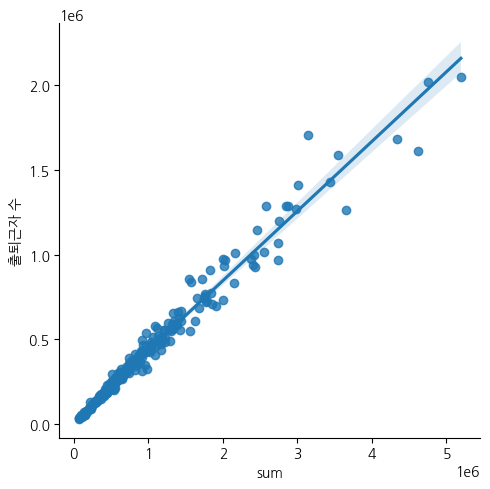

In [124]:
sns.lmplot(x='sum', y='출퇴근자 수', data=df3, palette='pastel')

In [123]:
df4 = df3[['sum', '회사계수', '환승계수', '2호선', '강남구로', '교통시설', '대학', '구별 인구수']]
cdf4 = df4.corr()
cdf4

,sum,회사계수,환승계수,2호선,강남구로,교통시설,대학,구별 인구수
sum,1.00,0.47,0.44,0.42,0.19,0.28,0.16,-0.08
회사계수,0.47,1.00,0.08,0.24,0.21,0.03,0.00,-0.00
환승계수,0.44,0.08,1.00,0.23,-0.02,0.11,0.06,-0.09
2호선,0.42,0.24,0.23,1.00,0.15,0.02,0.07,-0.07
강남구로,0.19,0.21,-0.02,0.15,1.00,0.02,-0.06,0.32
교통시설,0.28,0.03,0.11,0.02,0.02,1.00,0.05,-0.09
대학,0.16,0.00,0.06,0.07,-0.06,0.05,1.00,-0.13
구별 인구수,-0.08,-0.00,-0.09,-0.07,0.32,-0.09,-0.13,1.00


In [23]:
piv = df4.pivot_table(index=['회사계수', '2호선', '환승계수', '강남구로', '교통시설'], values=['sum'], aggfunc={'sum': [np.mean, 'count']}).sort_values(by=('sum', 'mean'), ascending=False)
piv

sum           
                         count       mean
회사계수 2호선  환승계수 강남구로 교통시설                 
0.00 0.00 1.00 1.00 1.00     1 3657799.00
1.00 1.00 0.00 1.00 0.00     3 3351474.33
     0.00 1.00 0.00 0.00     1 3145125.00
     1.00 1.00 1.00 0.00     2 2984287.50
0.00 0.00 1.00 0.00 1.00     2 2957994.00
1.00 1.00 1.00 0.00 0.00     3 2847343.00
0.00 1.00 1.00 1.00 0.00     3 2508199.33
1.00 1.00 0.00 0.00 0.00     2 2313451.50
0.00 1.00 1.00 0.00 0.00    11 2133899.91
     0.00 0.00 0.00 1.00     3 1974567.00
     1.00 0.00 0.00 1.00     1 1685237.00
1.00 0.00 0.00 1.00 1.00     1 1657007.00
               0.00 0.00     4 1595085.75
               1.00 0.00     3 1582649.67
0.00 1.00 0.00 1.00 0.00     7 1425062.14
     0.00 1.00 1.00 0.00     3 1270565.33
               0.00 0.00    27 1047496.19
     1.00 1.00 0.00 1.00     1 1030020.00
          0.00 0.00 0.00    17  687964.76
     0.00 0.00 0.00 0.00   142  603935.37
               1.00 0.00    25  574435.12

In [115]:
piv1 = piv[piv[('sum', 'mean')] > 1827800.90]
piv1.columns = piv1.columns.droplevel([0])
piv1 = piv1.reset_index()
piv2 = piv1.copy()
piv2['회사계수'] = piv1['회사계수'].multiply(piv1['count'].values)
piv2['2호선'] = piv1['2호선'].multiply(piv1['count'].values)
piv2['환승계수'] = piv1['환승계수'].multiply(piv1['count'].values)
piv2['강남구로'] = piv1['강남구로'].multiply(piv1['count'].values)
piv2['교통시설'] = piv1['교통시설'].multiply(piv1['count'].values)
piv2

,회사계수,2호선,환승계수,강남구로,교통시설,count,mean
0,0.00,0.00,1.00,1.00,1.00,1,3657799.00
1,3.00,3.00,0.00,3.00,0.00,3,3351474.33
2,1.00,0.00,1.00,0.00,0.00,1,3145125.00
3,2.00,2.00,2.00,2.00,0.00,2,2984287.50
4,0.00,0.00,2.00,0.00,2.00,2,2957994.00
5,3.00,3.00,3.00,0.00,0.00,3,2847343.00
6,0.00,3.00,3.00,3.00,0.00,3,2508199.33
7,2.00,2.00,0.00,0.00,0.00,2,2313451.50
8,0.00,11.00,11.00,0.00,0.00,11,2133899.91
9,0.00,0.00,0.00,0.00,3.00,3,1974567.00


In [117]:
piv3 = piv1.loc[:,'회사계수':'교통시설'].corr()
piv3
# piv3.iloc[0]
# piv3.columns

,회사계수,2호선,환승계수,강남구로,교통시설
회사계수,1.00,0.41,-0.22,0.00,-0.65
2호선,0.41,1.00,-0.09,0.25,-0.80
환승계수,-0.22,-0.09,1.00,0.09,-0.05
강남구로,0.00,0.25,0.09,1.00,-0.09
교통시설,-0.65,-0.80,-0.05,-0.09,1.00


(array([-1000000.,        0.,  1000000.,  2000000.,  3000000.,  4000000.,
         5000000.,  6000000.]),
 [Text(-1000000.0, 0, '-1'),
  Text(0.0, 0, '0'),
  Text(1000000.0, 0, '1'),
  Text(2000000.0, 0, '2'),
  Text(3000000.0, 0, '3'),
  Text(4000000.0, 0, '4'),
  Text(5000000.0, 0, '5'),
  Text(6000000.0, 0, '6')])

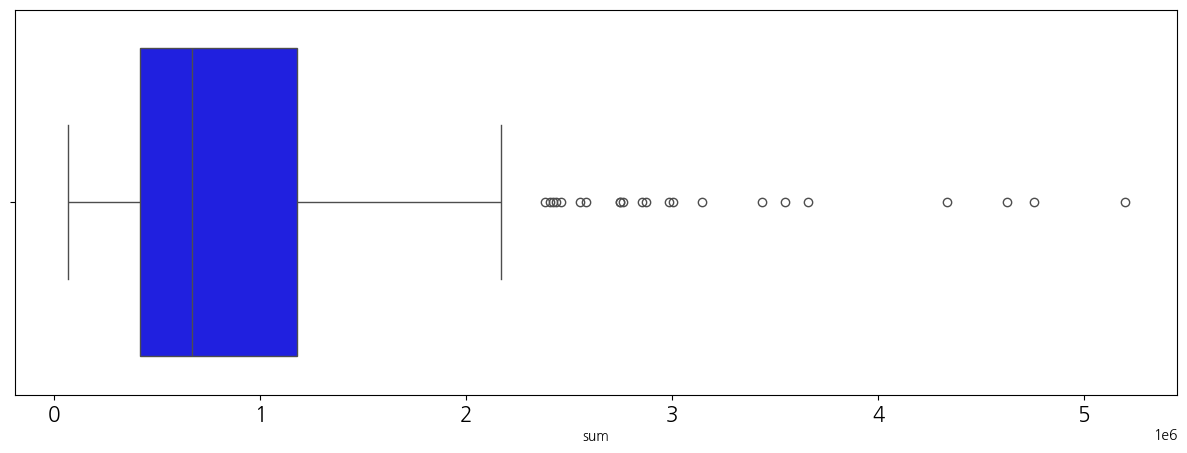

In [79]:
plt.figure(figsize=(15,5))
sns.boxplot(df3['sum'], orient='h', color='b')
plt.xticks(size=15)

In [34]:
vdf2 = df2.copy()
vdf2['역명'] = df2['역명'].str[:2]
vdf2


,역명,sum,morning,evening,sum-minus
0,잠실,5194890,704038,1346608,3144244
1,서울,4756511,803114,1217898,2735499
2,홍대,4625083,375923,1236319,3012841
3,강남,4331681,571652,1110558,2649471
4,고속,3657799,346451,918556,2392792
...,...,...,...,...,...
298,화전,80547,15324,19081,46142
299,도림,68324,16322,16170,35832
300,동작,65898,12398,17806,35694
301,남태,64213,16331,16655,31227


<Axes: >

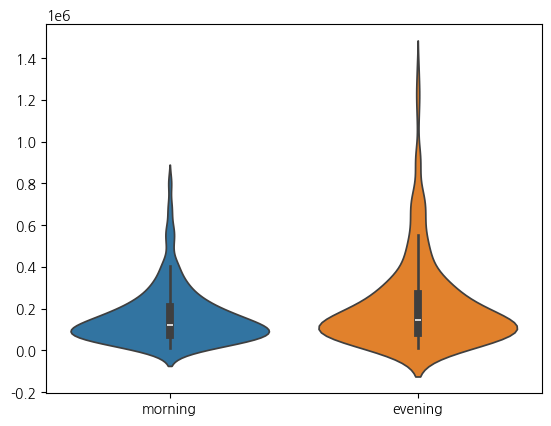

In [ ]:
sns.violinplot(data = df2.iloc[:,2:4])

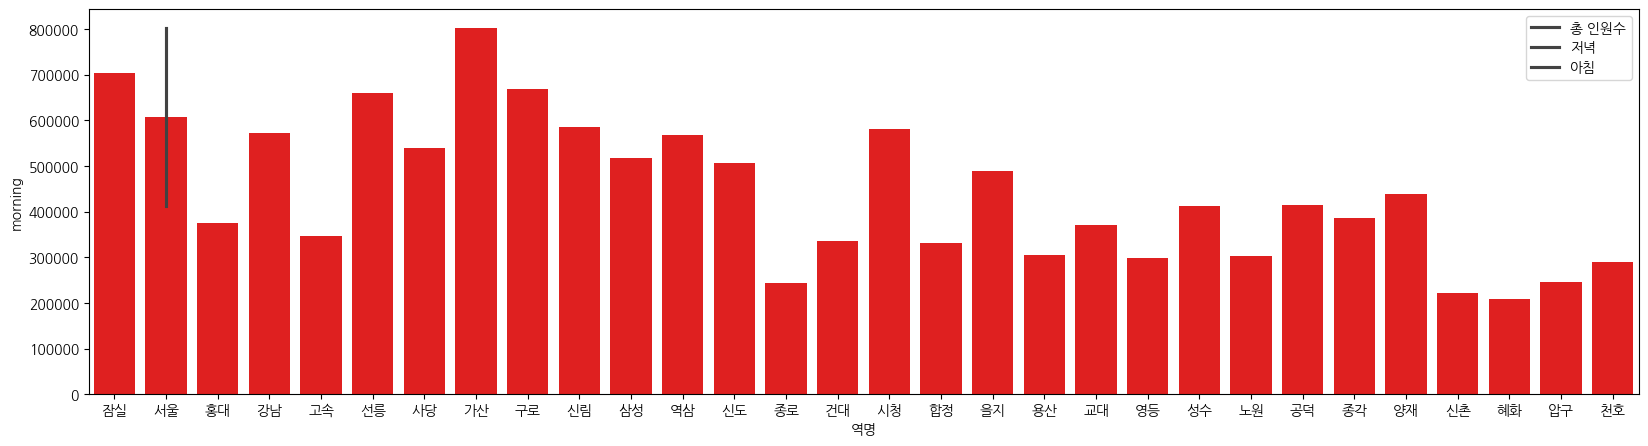

In [ ]:
fig, ax = plt.subplots(figsize=(20,5))
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=False))
ax.ticklabel_format(style='plain', axis='y')

sns.barplot(data=vdf2.loc[:30], x='역명', y='morning', label='아침', color='r')

plt.legend(['총 인원수', '저녁', '아침'])
plt.show()

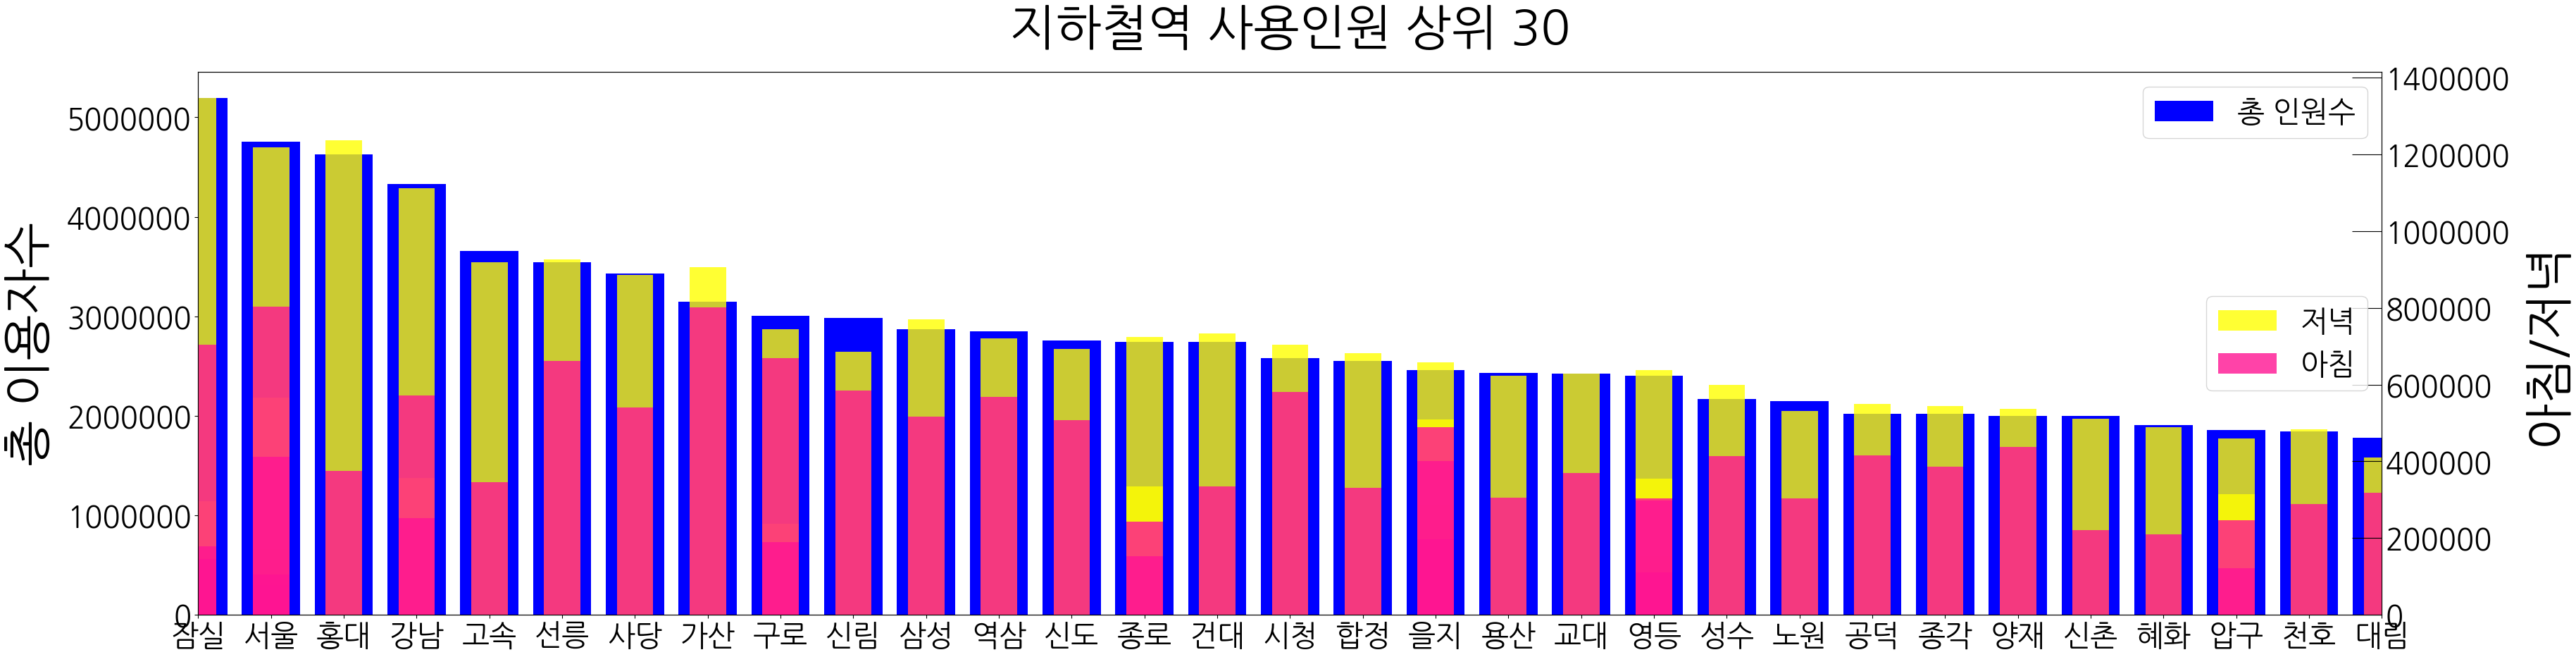

In [122]:
fig, ax1 = plt.subplots(figsize=(40,10))
ax1.set_title('지하철역 사용인원 상위 30', pad=30, fontsize=50)
ax1.bar(vdf2['역명'], vdf2["sum"], ls='solid', lw=3, color='b')
plt.xticks(rotation=360, size=30, )
plt.yticks(size=30)
ax1.set_ylabel('총 이용자수', labelpad=15, size = 50)
ax1.set_xlim('잠실', '대림')
ax1.yaxis.set_major_formatter(ScalarFormatter(useMathText=False))
ax1.ticklabel_format(style='plain', axis='y')
ax1.legend(['총 인원수', 'aaaa'], fontsize=30)

ax2 = ax1.twinx()
ax2.bar(vdf2['역명'], vdf2['evening'], color='yellow', label='Demand', alpha=0.8, width=0.5)
ax2.bar(vdf2['역명'], vdf2['morning'], color='deeppink', label='Demand', alpha=0.8, width=0.5)
ax2.legend(['저녁', '아침', 'ㅁㅁ'], loc = 5, fontsize=30)
ax2.set_ylabel('아침/저녁', labelpad=15, size = 50)
ax2.yaxis.set_major_formatter(ScalarFormatter(useMathText=False))
ax2.ticklabel_format(style='plain', axis='y')
plt.yticks(size=30)
ax2.tick_params(axis='y', direction='in', size = 30)



In [38]:
df3[['출퇴근자 수', '회사계수', '환승계수', '2호선', '강남구로', '교통시설']].corr()

,출퇴근자 수,회사계수,환승계수,2호선,강남구로,교통시설
출퇴근자 수,1.00,0.51,0.43,0.42,0.19,0.25
회사계수,0.51,1.00,0.08,0.24,0.21,0.03
환승계수,0.43,0.08,1.00,0.23,-0.02,0.11
2호선,0.42,0.24,0.23,1.00,0.15,0.02
강남구로,0.19,0.21,-0.02,0.15,1.00,0.02
교통시설,0.25,0.03,0.11,0.02,0.02,1.00


In [39]:
piv3 = df3.pivot_table(index=['회사계수', '2호선', '환승계수', '강남구로', '교통시설'], values=['출퇴근자 수'], aggfunc={'출퇴근자 수': [np.mean, 'count']}).sort_values(by=('출퇴근자 수', 'mean'), ascending=False)
piv3

출퇴근자 수           
                          count       mean
회사계수 2호선  환승계수 강남구로 교통시설                  
1.00 0.00 1.00 0.00 0.00      1 1708552.00
     1.00 0.00 1.00 0.00      3 1418597.33
          1.00 1.00 0.00      2 1293017.00
0.00 0.00 1.00 0.00 1.00      2 1265696.00
               1.00 1.00      1 1265007.00
1.00 1.00 1.00 0.00 0.00      3 1184518.33
          0.00 0.00 0.00      2 1079056.50
0.00 1.00 1.00 1.00 0.00      3 1066009.00
               0.00 0.00     11  882655.64
1.00 0.00 0.00 0.00 0.00      4  805418.25
0.00 0.00 0.00 0.00 1.00      3  757902.33
1.00 0.00 0.00 1.00 1.00      1  745447.00
0.00 1.00 0.00 0.00 1.00      1  684365.00
1.00 0.00 0.00 1.00 0.00      3  637052.00
0.00 1.00 0.00 1.00 0.00      7  625402.14
     0.00 1.00 1.00 0.00      3  549979.67
               0.00 0.00     27  446312.41
     1.00 1.00 0.00 1.00      1  427298.00
          0.00 0.00 0.00     17  308483.00
     0.00 0.00 0.00 0.00    142  268507.11
               1.00 0.00     25  261935.92

In [40]:
piv1 = piv3[piv3[('출퇴근자 수', 'mean')] > 765856.60]
piv1.columns = piv1.columns.droplevel([0])
piv1 = piv1.reset_index()
piv2 = piv1.copy()
piv2['회사계수'] = piv1['회사계수'].multiply(piv1['count'].values)
piv2['2호선'] = piv1['2호선'].multiply(piv1['count'].values)
piv2['환승계수'] = piv1['환승계수'].multiply(piv1['count'].values)
piv2['강남구로'] = piv1['강남구로'].multiply(piv1['count'].values)
piv2['교통시설'] = piv1['교통시설'].multiply(piv1['count'].values)
piv2

,회사계수,2호선,환승계수,강남구로,교통시설,count,mean
0,1.00,0.00,1.00,0.00,0.00,1,1708552.00
1,3.00,3.00,0.00,3.00,0.00,3,1418597.33
2,2.00,2.00,2.00,2.00,0.00,2,1293017.00
3,0.00,0.00,2.00,0.00,2.00,2,1265696.00
4,0.00,0.00,1.00,1.00,1.00,1,1265007.00
5,3.00,3.00,3.00,0.00,0.00,3,1184518.33
6,2.00,2.00,0.00,0.00,0.00,2,1079056.50
7,0.00,3.00,3.00,3.00,0.00,3,1066009.00
8,0.00,11.00,11.00,0.00,0.00,11,882655.64
9,4.00,0.00,0.00,0.00,0.00,4,805418.25


In [121]:
print(df4.pivot_table(index=['회사계수', '환승계수'], values=['sum'], aggfunc={'sum': [np.mean, 'count']}).sort_values(by=('sum', 'mean'), ascending=False).iloc[[0,3]])
print(df4.pivot_table(index=['회사계수', '2호선'], values=['sum'], aggfunc={'sum': [np.mean, 'count']}).sort_values(by=('sum', 'mean'), ascending=False).iloc[[0,3]])
print(df4.pivot_table(index=['환승계수', '교통시설'], values=['sum'], aggfunc={'sum': [np.mean, 'count']}).sort_values(by=('sum', 'mean'), ascending=False).iloc[[0,3]])
print(df4.pivot_table(index=['2호선', '교통시설'], values=['sum'], aggfunc={'sum': [np.mean, 'count']}).sort_values(by=('sum', 'mean'), ascending=False).iloc[[0,3]])
print(df4.pivot_table(index=['2호선', '강남구로'], values=['sum'], aggfunc={'sum': [np.mean, 'count']}).sort_values(by=('sum', 'mean'), ascending=False).iloc[[0,3]])
print(df4.pivot_table(index=['2호선', '환승계수'], values=['sum'], aggfunc={'sum': [np.mean, 'count']}).sort_values(by=('sum', 'mean'), ascending=False).iloc[[0,3]])
print('---------------------------------------------------------------------------------------')
print(df4.pivot_table(index=['회사계수', '2호선', '환승계수'], values=['sum'], aggfunc={'sum': [np.mean, 'count']}).sort_values(by=('sum', 'mean'), ascending=False).iloc[[2,7]])

            sum           
          count       mean
회사계수 환승계수                 
1.00 1.00     6 2942621.50
0.00 0.00   195  663587.05
            sum           
          count       mean
회사계수 2호선                  
1.00 1.00    10 2919193.00
0.00 0.00   203  727641.78
            sum           
          count       mean
환승계수 교통시설                 
1.00 1.00     4 2650951.75
0.00 0.00   203  727094.35
            sum           
          count       mean
2호선  교통시설                 
0.00 1.00     7 2450642.14
     0.00   205  714571.76
            sum           
          count       mean
2호선  강남구로                 
1.00 1.00    15 2234868.73
0.00 0.00   179  756460.20
            sum           
          count       mean
2호선  환승계수                 
1.00 1.00    20 2326906.05
0.00 0.00   178  667576.97
---------------------------------------------------------------------------------------
                 sum           
               count       mean
회사계수 2호선  환승계수                 
1.00 1

In [43]:
# '회사계수', '2호선', '환승계수', '강남구로', '교통시설'
print(df3.pivot_table(index=['회사계수', '2호선'], values=['출퇴근자 수'], aggfunc={'출퇴근자 수': [np.mean, 'count']}).sort_values(by=('출퇴근자 수', 'mean'), ascending=False).iloc[[0,3]])
print(df3.pivot_table(index=['회사계수', '환승계수'], values=['출퇴근자 수'], aggfunc={'출퇴근자 수': [np.mean, 'count']}).sort_values(by=('출퇴근자 수', 'mean'), ascending=False).iloc[[0,3]])
print(df3.pivot_table(index=['2호선', '강남구로'], values=['출퇴근자 수'], aggfunc={'출퇴근자 수': [np.mean, 'count']}).sort_values(by=('출퇴근자 수', 'mean'), ascending=False).iloc[[0,3]])
print(df3.pivot_table(index=['2호선', '환승계수'], values=['출퇴근자 수'], aggfunc={'출퇴근자 수': [np.mean, 'count']}).sort_values(by=('출퇴근자 수', 'mean'), ascending=False).iloc[[0,3]])
print('---------------------------------------------------------------------------------------')
print(df3.pivot_table(index=['회사계수', '2호선', '환승계수'], values=['출퇴근자 수'], aggfunc={'출퇴근자 수': [np.mean, 'count']}).sort_values(by=('출퇴근자 수', 'mean'), ascending=False).iloc[[2,7]])

          출퇴근자 수           
           count       mean
회사계수 2호선                   
1.00 1.00     10 1255349.40
0.00 0.00    203  317472.35
          출퇴근자 수           
           count       mean
회사계수 환승계수                  
1.00 1.00      6 1308023.50
0.00 0.00    195  293623.11
          출퇴근자 수          
           count      mean
2호선  강남구로                 
1.00 1.00     15 961177.87
0.00 0.00    179 334713.79
          출퇴근자 수          
           count      mean
2호선  환승계수                 
1.00 1.00     20 973706.30
0.00 0.00    178 296788.71
---------------------------------------------------------------------------------------
               출퇴근자 수           
                count       mean
회사계수 2호선  환승계수                  
1.00 1.00 1.00      5 1227917.80
0.00 0.00 0.00    170  276177.15


<Axes: xlabel='호선명', ylabel='sum'>

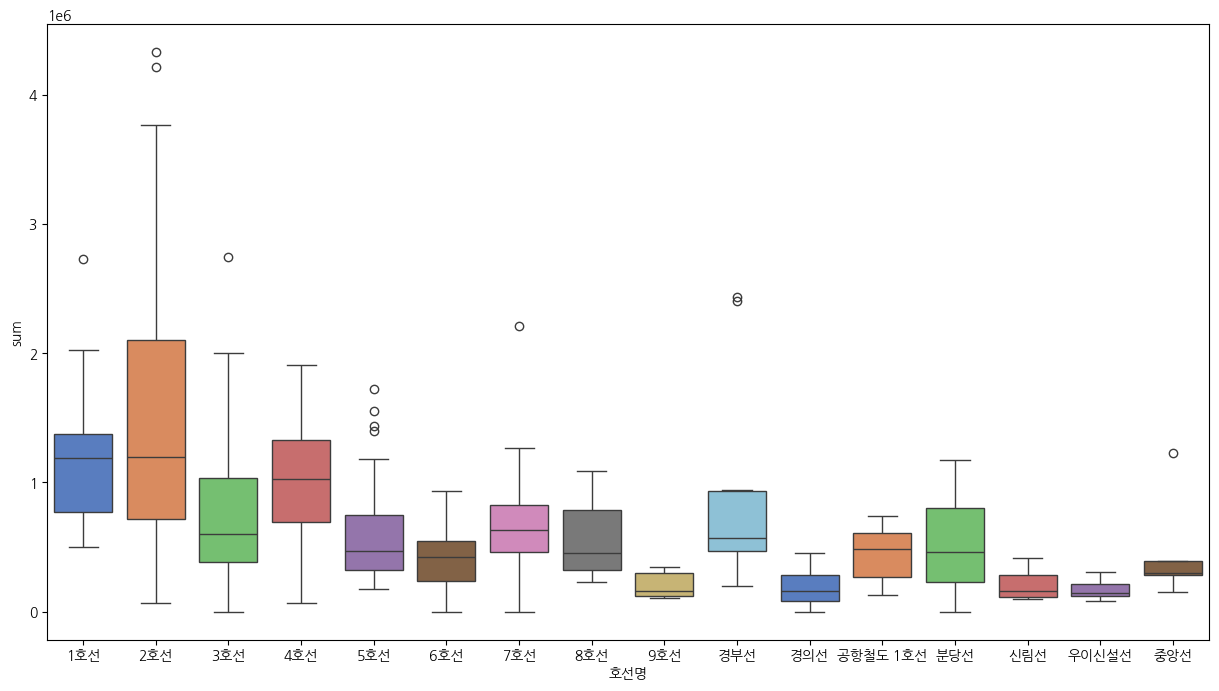

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(x='호선명', y='sum', data=df, palette='muted')

<Axes: xlabel='구', ylabel='sum'>

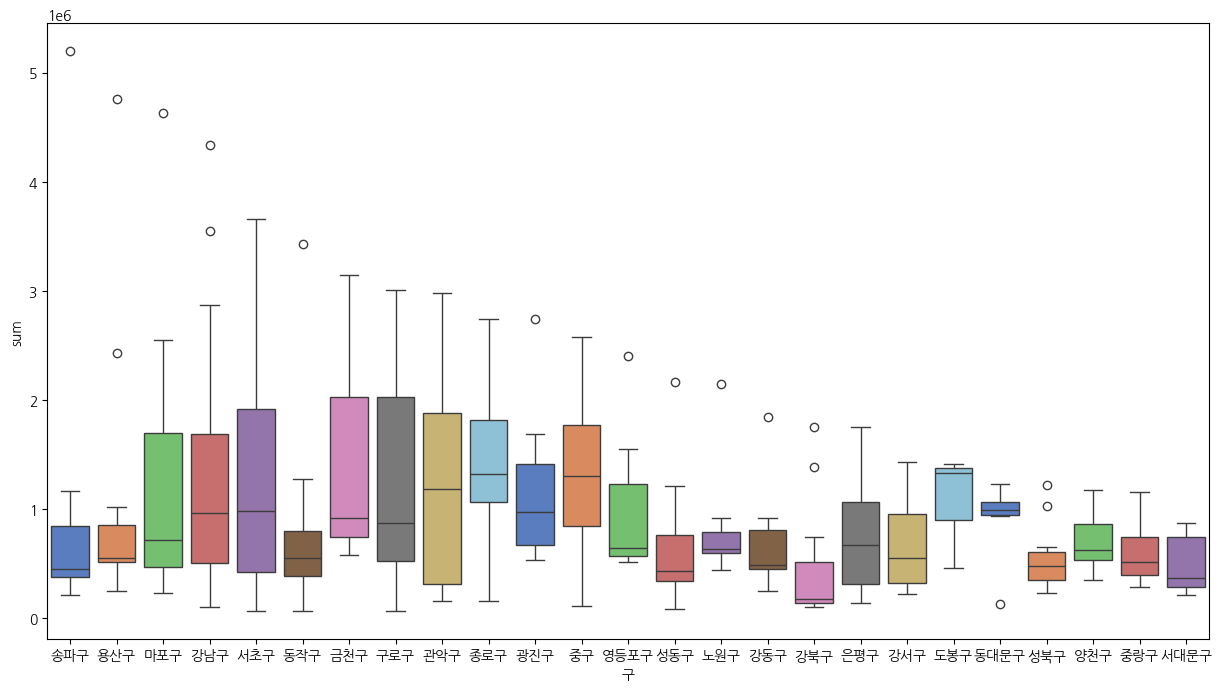

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(x='구', y='sum', data=df3, palette='muted')

In [48]:
vdf3 = df3.sort_values(by='회사 수', ascending=False)[:40]
vdf3[['역명', '구', '회사 수', '출퇴근자 수']]

,역명,구,회사 수,출퇴근자 수
7,가산디지털단지,금천구,774.00,1708552
3,강남,강남구,619.00,1682210
11,역삼,강남구,535.00,1287168
22,성수,성동구,421.00,1012105
75,문정,송파구,417.00,579856
5,선릉,강남구,400.00,1587090
40,신사,강남구,362.00,608296
59,학동,강남구,323.00,596785
10,삼성,강남구,314.00,1286414
17,을지로입구,중구,308.00,1146008


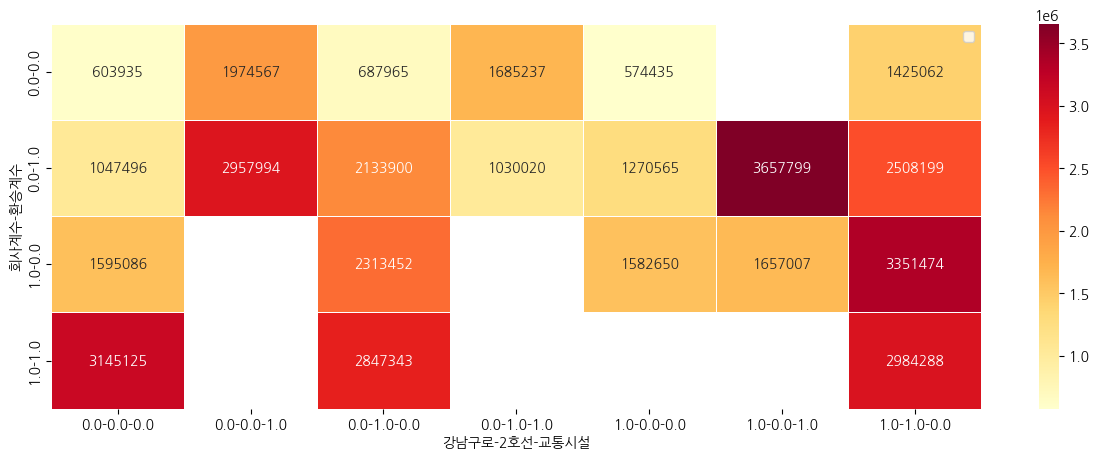

In [98]:
pivot = df3.pivot_table(index=['회사계수', '환승계수'], columns=['강남구로', '2호선', '교통시설'], values='sum', aggfunc='mean', )
plt.figure(figsize=(15,5))
sns.heatmap(pivot, annot=True, fmt=".0f", lw=0.5, cmap='YlOrRd')
plt.legend(['tn'])

<Axes: xlabel='강남구로-2호선-교통시설', ylabel='회사계수-환승계수'>

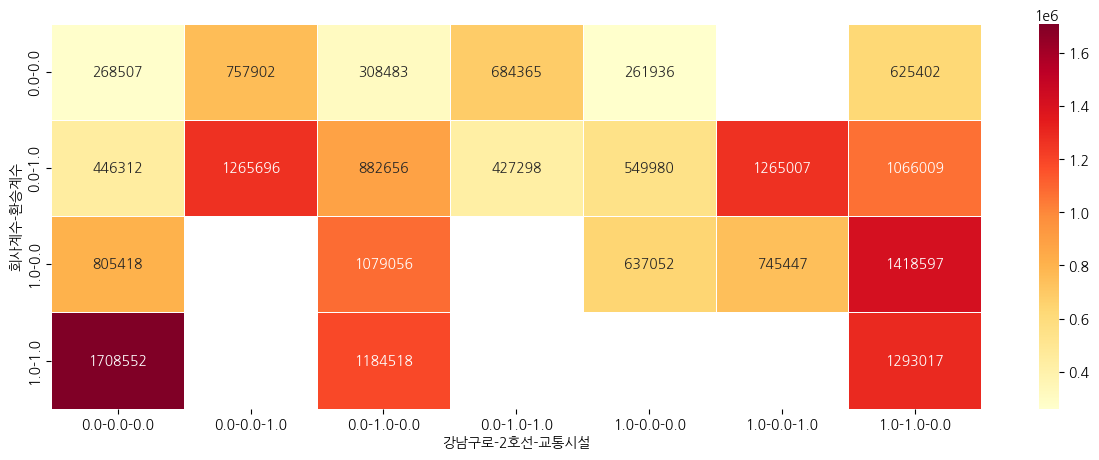

In [99]:
pivot = df3.pivot_table(index=['회사계수', '환승계수'], columns=['강남구로', '2호선', '교통시설'], values='출퇴근자 수', aggfunc='mean', )

plt.figure(figsize=(15,5))
sns.heatmap(pivot, annot=True, fmt=".0f", lw=0.5, cmap='YlOrRd')

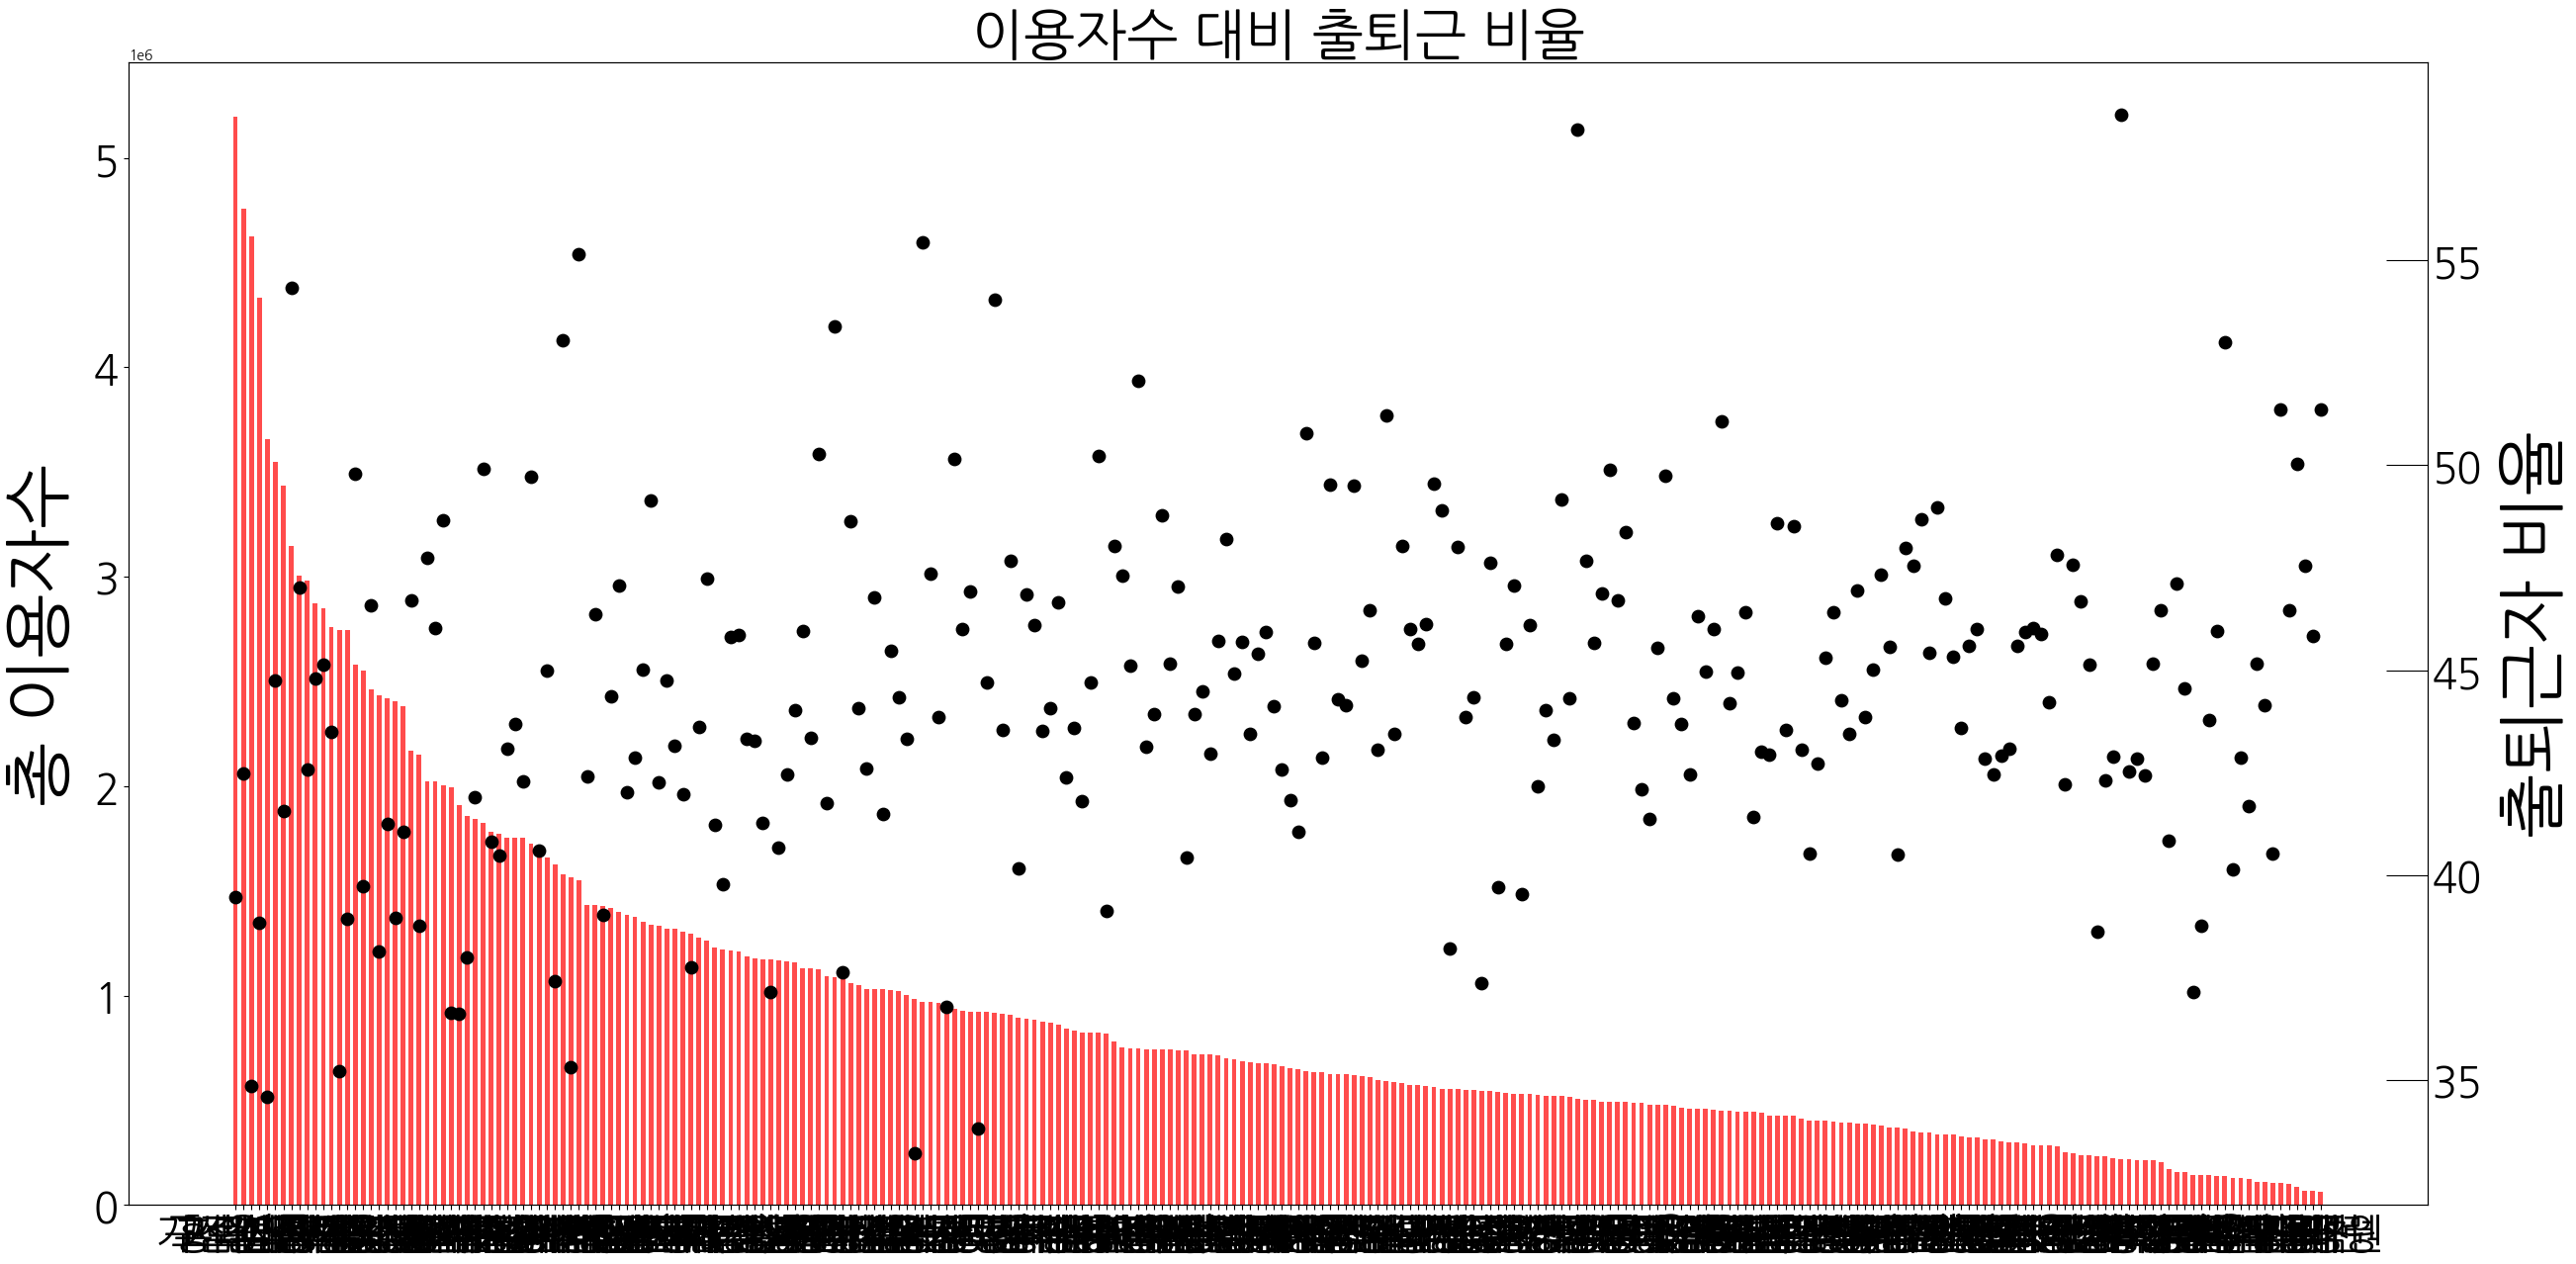

In [107]:
fig, ax1 = plt.subplots(figsize=(30,15))
ax1.bar(df3['역명'], df3['sum'], color='r', label='Demand', alpha=0.7, width=0.6)
ax1.set_title('이용자수 대비 출퇴근 비율', size=40)
ax1.set_ylabel('총 이용자수', labelpad=15, size = 50)
plt.xticks(rotation=360, size=30, )
plt.yticks(size=30)
# ax1.set_xlabel('에피소드', labelpad=15, size = 50)

ax2 = ax1.twinx()
ax2.scatter(df3['역명'], df3['출퇴근자 비율'], c='k', s=80)
ax2.set_ylabel('출퇴근자 비율', labelpad=15, size = 50)
ax2.yaxis.set_major_formatter(ScalarFormatter(useMathText=False))
ax2.ticklabel_format(style='plain', axis='y')
plt.yticks(size=30)
ax2.tick_params(axis='y', direction='in', size = 30)